# Ordinary Differential Equations (ODE)

Ordinary differential equations (ODEs) arise in many fields of physics, but also in social and other natural sciences. 
Often, quantities are defined as the rate of change of other quantities (for example, derivatives of displacement with respect to time $\dot{x}(t)$, $\dot{y}(t)$ are related to $x(t)$, $y(t)$ and $t$). This results in ODE. 

## Definition 

If differential equation contains only one independent variable (such as time $t$) and hence only derivatives with respect to this single independent variable are present (like $\dot{x}$, $\ddot{x}$,...), we classify it as an ordinary differential equation (ODE). If derivatives with respect to more than one independent variables appear, we call it a `partial differential equation`. The latter is more challenging to solve (for example using `Finite element method`) and we will not discuss it here.

In ODE only total derivatives (and no partial derivatives) appear. In general, it might be written in a form
$$F(t, y(t), \frac{d y(t)}{dt}, \frac{d^2 y(t)}{dt^2}, ... \frac{d^n y(t)}{dt^n})=0$$
where $F$ is an arbitrary function, and it could be non-linear in its arguments.

One of the simplest examples is the Newton's law:

$$m \frac{d^2 x_i(t)}{dt^2} = F_i(x_1,x_2,x_3,t)$$

Here $(x_1,x_2,x_3)=(x,y,z)$ and $F_i$ is the force.

## Classification

ODE's are usually classified into:
- Linear ODE : in which F is a linear function of its arguments, for example
   $$ \sum_{n=0}^N a_n \frac{d^n y(t)}{dt^n} -r (t)= 0 $$
   Here $r(t)$ is an arbitrary function, which we usually call source term.

- Homogeneous ODE : In this case source term $r(t)=0$ and hence $y(t)=0$ is also a trivial solution. But note that homogeneous ODE can be non-linear.

- Autonomous ODE : If it does not explicitely depent on $t$.
- Non-linear ODE : at least one derivative appears at higher power than 1, i.e., $\left(\frac{d^n y(t)}{dt^n}\right)^2$.
- inhomogeneous : r(t) is nonzero.


What can we say about the Newton's equation and this classification?

## Numerical solvers

Many general purpose numerical solvers have been developed, which are easy to use, and can solve an arbitrary ODE. 

We will discuss a few below: `Runge Kutta method`, `Numerov`, `Verlet`, etc.

While very generic solvers exist in `scipy.integrate.ode`, the precision of the solution can be a problem. For example, it is hard to follow Newton's eq. of motion for a very long time as the precision might deteriorate (molecular dynamics is challenging). If ODE is non-linear, it tends to be even more challenging to solve numerically. For example, the numerical solution might exhibit instability in some regimes, which is called `stiffness`. This is often caused by the presence of different time scales in the underlying problem. For example, a non-elastic collision in a mechanical system typically occurs at much smaller time scale than the time for the motion of objects, and this discrepancy causes a very "sharp turns" in the curves of the state parameters. These are difficult to capture numerically.


## Reduction to a first-order system


Most ODE integration algorithms (integrators) solve first order ODE's only, but with any number of components. It is simple to see that any high order ODE can be reduced to a larger system of first order ODE. 

For a generic form
$$F(t, y(t), \frac{d y(t)}{dt}, \frac{d^2 y(t)}{dt^2}, ... \frac{d^n y(t)}{dt^n})=0$$
we could, always rewrite into
$$\frac{d^n y(t)}{dt^n} = \widetilde{F}(t, y(t), \frac{d y(t)}{dt}, \frac{d^2 y(t)}{dt^2}, ...\frac{d^{n-1} y(t)}{dt^{n-1}})$$

Than we can choose
\begin{eqnarray}
&&y(t) \equiv y_0(t)  \\
&&\frac{d y(t)}{dt}=\frac{d y_0(t)}{dt}\equiv y_1(t)\\
&&\frac{d^2 y(t)}{dt^2}=\frac{d y_1(t)}{dt}\equiv y_2(t)\\
&&\frac{d^3 y(t)}{dt^3}=\frac{d y_2(t)}{dt}\equiv y_3(t)\\
&&...\\
&&\frac{d^n y(t)}{dt^n}=\frac{d y_{n-1}(t)}{dt}=\widetilde{F}(t, y_0(t), y_1(t), y_2(t), ...y_{n-1}(t))
\end{eqnarray}
This proves that $n$-th order ODE is equivalent to $n$ component first order ODE. Here $y(t)$ could itself be multi-component function, for example $(x,y,z)$, and we would than have $3 n$ component first order ODE.


A good example of such transformation in physics is transformation of Lagrangian $L$ equations, which involve the second order derivatives $\ddot{x}(t)$, to Hamiltonian $H$ equations, which involve only $\dot{p}(t)$ and $\dot{x}(t)$.


Since it is always possible to transform n-other ODE into n-component first order ODE, we are going to discuss numeric treatment of the first order ODE of the form:

$$\frac{d y(t)}{dt}=\overline{F}(t, y(t))$$

where $y=[y_0,y_1,...y_{n-1}]$ and $\overline{F}=[\dot{y}_0,\dot{y}_1,...,\widetilde{F}(t,y_0,....y_{n-1})]$

## Boundary conditions

To solve ODE, the boundary conditions need to be specified. For $n$-th component first order ODE (or n-th order ODE) we need exactly $n$ boundary condistions.



Boundary conditions can be classified into:
- **Initial value problems** : all necessary conditions are specified at the starting point ($t_0$): 
\begin{eqnarray}
&&y_0(t_0)=x_0\\ 
&&y_1(t_0)=x_1\\ 
&&...\\
&&y_{n-1}(t_0)=x_{n-1}
\end{eqnarray}

    For example, in projectile motion, we give the initial position $x_0=y(t_0)$ and the initial velocity $v_0=dy(t_0)/dt$.

- **Two point boundary problems** : part of the conditions are specified at the starting point ($t_0$),  and the rest at the end point ($t_f$)

    For example, projectile motion, in which we are given the initial position $x_0=y(t_0)$ and the end position $x_f=y(t_f)$. The initial velocity needs to be guessed by so-called shooting method.
    
- **More complicated boundary conditions** :  an arbitrary set of nonlinear equations relating values of $y_i(t)$ and their derivatives $d y_i(t)/dt$ at any points $t$. 

Standard numeric solvers can only solve **Initial value problem**. All other boundary conditions have to be solved by iterations or **shooting**, in which we attempt to solve ODE many times, and try to satisfy the boundary conditions better and better with iterations.

## Euler's method



From any point on a curve, you can find an approximation of a nearby point on the curve by moving a short distance along a line tangent to the curve.

We replace the derivative $\frac{dy(t)}{dt}$ by the finite difference approximation:
$$\frac{dy(t)}{dt}\approx \frac{y(t+h)-y(t)}{h}$$
When inserting this approximation into ODE, we get
$$y(t+h) \approx y(t) + h \overline{F}(t, y(t))$$

If we choose a constant step $h$, so that $t_1 = t_0+h$, $t_2=t_0+2 h$,..., $t_n=t_0+n h=t_f$, and we define $y_i \equiv y(t_i)=y(t_0+i h)$
we have simple recurrence relation:

$$y_{i+1}=y_i  + h \overline{F}(t, y_i) + O(h^2)$$

which shows that each step give an error of the order $h^2$. The error grows very quickly, and Euler's method is not being used in practice.

## Runge-Kutta methods

The second order Runge-Kutta is only slightly better than Euler's, but demonstrates the idea of this method. 

In Euler's method the derivative is taken at the beginning of the interval.
The precision would increase if one could estimate derivative in the middle of the interval $$y_{i+1}=y_i + h \overline{F}(t_i+h/2,y(t_i + h/2))$$.

The second order Runge-Kutta (**RK2**) method implements precisely this idea, namely,
\begin{eqnarray}
 && k_1 = h \overline{F}(t_i,y_i)\\
 && y_{i+1} = y_i + h \overline{F}(t_i+\frac{1}{2}h,y_i + \frac{1}{2}k_1) + O(h^3)
\end{eqnarray}
It is called the second order, because error is of the order of $h^3$. In
general, the error of the $n$-th order routine is $O(h^{n+1})$.

Most popular is the **forth-order Runge Kutta (RK4)** method, which builds on the above idea of evaluating derivative somewhere inside the interval:
\begin{eqnarray}
  && k_1 = h \overline{F}(t_i,y_i)\\
  && k_2 = h \overline{F}(t_i+\frac{1}{2}h,y_i+\frac{1}{2}k_1)\\
  && k_3 = h \overline{F}(t_i+\frac{1}{2}h,y_i+\frac{1}{2}k_2)\\
  && k_4 = h \overline{F}(t_i+h, y_i+k_3)\\
  && y_{i+1} = y_i + \frac{1}{6}k_1+\frac{1}{3}k_2+\frac{1}{3}k_3+\frac{1}{6}k_4+O(h^5)
\end{eqnarray}

How do we understand the method? Looking at the above figure, we see:
- $k_1$ is the slope at the beginning of the interval;
- $k_2$ is the slope at the midpoint of the interval, using slope $k_1$ to determine the value of $y$ at the point $t_i + h/2$ using Euler's method;
- $k_3$ is again the slope at the midpoint, but now using the slope $k_2$ to determine the $y$-value;
- $k_4$ is the slope at the end of the interval, with its $y$-value determined using $k_3$;
- in averaging the four slopes, greater weight is given to the slopes at the midpoint.

The RK4 method is a fourth-order method, meaning that the error per
step is on the order of $h^5$, while the total accumulated error has
order $h^4$. With only four function evaluations, for fourth order
accuracy is extremely good.


<img src="rkmethod.pdf">

## Example: Bouncing Ball

The bouncing ball has Newton's Eq:
$$ \frac{d^2 y(t)}{dt^2}=-g$$
which can be reduce to two first order ODE's:
$$\frac{dy}{dt} = v$$
$$\frac{dv}{dt} = -g$$

The initial condition is $v(0)=0$ and $y(0)=y_0$.

We will first solve this with direct Euler's method. Next we will use RK4 and other more advanced method to get more precise solution.

Euler's method requires:
\begin{eqnarray}
&&y(t+h) = y(t) + h\; v(t)\\
&&v(t+h) = v(t) - h\; g
\end{eqnarray}

### Free fall first

In [1]:
import numpy as np

g = 9.81

# intital conditions
y = 10.
v = 0.0

ti = 0
tf = 2.
Nt=201

# fixed time point
t = np.linspace(ti,tf,Nt)
dt=t[1]-t[0]

data = np.zeros((len(t),2))
data[0,:]=[y,v]
for i in range(Nt-1):
    y = y + v*dt
    v = v - g*dt
    data[i+1,:] = [y, v] 

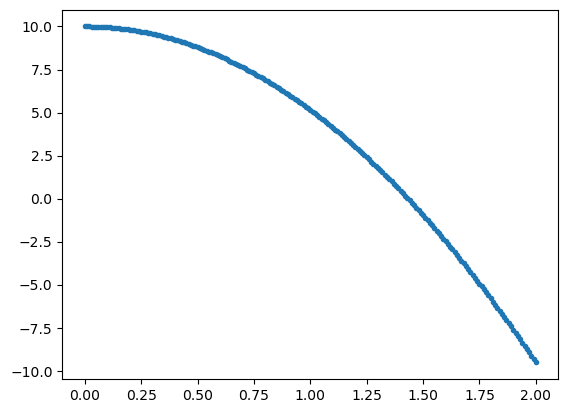

In [2]:
import matplotlib.pyplot as plt

plt.plot(t, data[:,0],'.-')

### Bouncing

Add a floor at $y=0$.

What happens at the floor? – 
The ball bounces back elastically, hence velocity is reversed on collision $v\rightarrow -v$.

In [3]:
import numpy as np

g = 9.81

# intital conditions
y = 10.
v = 0.0
y_floor = 0


ti = 0
tf = 20.
Nt=2001

# fixed time point
t = np.linspace(ti,tf,Nt)
dt=t[1]-t[0]

data = np.zeros((len(t),2))
data[0,:]=[y,v]
for i in range(Nt-1):
    y = y + v*dt
    if y > y_floor:
        v = v - g*dt
    else:
        v = -v   # bounce off
    data[i+1,:] = [y, v] 
 

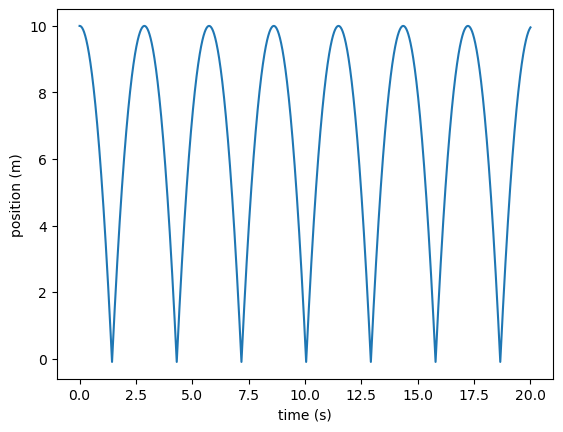

In [4]:
plt.plot(t, data[:,0])
plt.xlabel("time (s)")
plt.ylabel("position (m)");

## Example: Oscilators

Harmonic oscilator : $V=\frac{1}{2} k x^2$ and $F=-\frac{dV(x)}{dx}=-k x$

Anharmonic oscilator : $V=\frac{1}{2} k x^2 (1-\frac{2}{3}\alpha x)$ and $F=-kx (1-\alpha x)$

$$m \ddot{x} = F$$

Harmonic oscilator : $$\ddot{x}+ \omega^2 x=0$$
Anharmonic oscilator: $$\ddot{x}+\omega^2 x(1-\alpha x)=0$$
where we used $\omega=\sqrt{\frac{k}{m}}$ and we can just set $\alpha=0$ to recover harmonic oscilator from anharmonic.

Corresponding First order Eq:
\begin{eqnarray}
&&\frac{d x(t)}{dt} = v\\
&&\frac{d v(t)}{dt}= -\omega^2 x (1-\alpha x)
\end{eqnarray}

Total energy should be conserved. The expression for total energy is
$$E=T+V = \frac{1}{2} m \dot{x}^2+k(\frac{1}{2} x^2-\frac{1}{3}\alpha x^3),$$ which can also be written as
$$\frac{E}{m} = \frac{1}{2}\dot{x}^2+\omega^2(\frac{1}{2} x^2-\frac{1}{3}\alpha x^3)$$



### Recall the integration methods:
- Euler: 
\begin{eqnarray}
y_{i+1}=y_i  + h \overline{F}(t, y_i) + O(h^2)
\end{eqnarray}
- RK2:
\begin{eqnarray}
  && k_1 = h \overline{F}(t_i,y_i)\\
  && k_2 = h \overline{F}(t_i+\frac{1}{2}h,y_i+\frac{1}{2}k_1)\\
  && y_{i+1} = y_i + h k_2+O(h^3)
\end{eqnarray}

- RK4: 
\begin{eqnarray}
  && k_1 = h \overline{F}(t_i,y_i)\\
  && k_2 = h \overline{F}(t_i+\frac{1}{2}h,y_i+\frac{1}{2}k_1)\\
  && k_3 = h \overline{F}(t_i+\frac{1}{2}h,y_i+\frac{1}{2}k_2)\\
  && k_4 = h \overline{F}(t_i+h, y_i+k_3)\\
  && y_{i+1} = y_i + \frac{1}{6}k_1+\frac{1}{3}k_2+\frac{1}{3}k_3+\frac{1}{6}k_4+O(h^5)
\end{eqnarray}


In [5]:
## Three simple integrators implementations

def euler(y, f, t, h):
    """Euler integrator.
    Returns new y(t+h), where y=y(t).
    """
    return y + h * f(t, y)

def rk2(y, f, t, h):
    """Runge-Kutta RK2 midpoint"""
    k1 = f(t, y)
    k2 = f(t + 0.5*h, y + 0.5*h*k1)
    return y + h*k2

def rk4(y, f, t, h):
    """Runge-Kutta RK4"""
    k1 = f(t, y)
    k2 = f(t + 0.5*h, y + 0.5*h*k1)
    k3 = f(t + 0.5*h, y + 0.5*h*k2)
    k4 = f(t + h, y + h*k3)
    return y + h/6 * (k1 + 2*k2 + 2*k3 + k4)

Recall First order Eq:
\begin{eqnarray}
\begin{bmatrix}\frac{d x(t)}{dt}\\ \frac{d v(t)}{dt}\end{bmatrix}=
\begin{bmatrix}v \\ -\omega^2 x (1-\alpha x)\end{bmatrix}
\end{eqnarray}

Total energy :
$$\frac{E}{m} = \frac{1}{2}v^2+\frac{1}{2} x^2 \omega^2(1-\frac{2}{3}\alpha\; x)$$


In [6]:
def Harmonic(t, y, w2=1):
    """Harmonic EOM"""
    return np.array([y[1],-w2*y[0]])

def anHarmonic(t, y, alpha=0.5, w2=1):
    """anharmonic EOM"""
    return np.array([y[1],-w2*y[0]*(1-alpha*y[0])])

def E_harmonic(y, w2=1):
    """Harmonic total energy  E(v,x)/m = 1/2*(v^2+ w^2 x^2) """
    T = 0.5*y[1]**2
    V = 0.5*w2*y[0]**2
    return np.array([T+V,T,V])

def E_anharmonic(y, alpha=0.5, w2=1):
    """Anharmonic total energy E(v,x)/m = 1/2*(v^2 + w^2 x^2 (1 - 2/3 alpha x)"""
    T = 0.5*y[1]**2
    V = 0.5*w2*y[0]**2*(1 - 2./3.*alpha*y[0])
    return np.array([T+V,T,V])

Next we code a generic `Solve` for fixed step integrators, which we just implemented. 
It will take arguments `solver`, which can be `euler` or `rk4` and `derivs`, which can be `Harmonic` or `anHarmonic`.

In [7]:
def Solve(t, y0, solver=euler, derivs=Harmonic):
    """ t is independent variable, which needs to be a predefined mesh of points (could be non-equidistant).
        y0 is the initial value for [x,v]
        solver can be euler/rk2/rk4/verlet, etc
        derivs needs to provide derivatives, for example Harmonic or anHarmonic
    """
    data = np.zeros((len(t),2))  # storage for solution
    y = np.array(y0)
    data[0,:]=y
    for i in range(len(t)-1):
        y = solver(y,derivs,t[i],t[i+1]-t[i])
        data[i+1,:] = y 
    return data

# Next we evaluate for Harmonic oscilator using Euler and RK4
# intital conditions
x = 0    # initial position
v = 1.0  # initial velocity
# time mesh
ti = 0    # initial time
tf = 100. # end time
Nt=2001   # number of points, gives step of 0.05
t = np.linspace(ti,tf,Nt)

dataE = Solve(t, [x,v], euler, Harmonic)
dataR = Solve(t, [x,v], rk4, Harmonic)

Ene = E_harmonic(dataE.T)
Enr = E_harmonic(dataR.T)

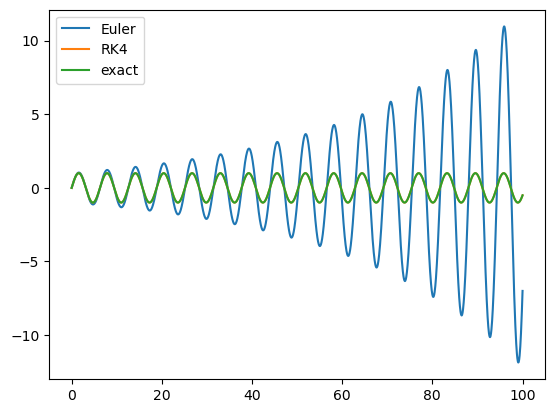

In [8]:
plt.plot(t, dataE[:,0], label='Euler')
plt.plot(t, dataR[:,0], label='RK4')
plt.plot(t, np.sin(t), label='exact')
plt.legend(loc='best');

We notice that $RK4$ is orders of magnitude better than Euler in solving the harmonic oscillator (HO). Euler's method increases the amplitude of oscillations, which means that energy is erroneously increasing.

Next we plot the energy change with time

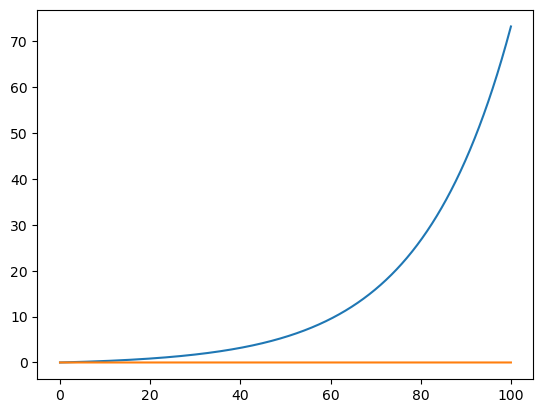

In [9]:
E0=Ene[0,0]
plt.plot(t,Ene[0]-E0)
plt.plot(t,Enr[0]-E0);

Indeed, the energy shows huge increase in Euler's method, but mostly constant in RK4.
Using Euler's method we are clearly not solving the equations of motions in a physically meaningful way.

Next we plot RK4 energy alone to see the error better:

-2.1694602519994888e-07


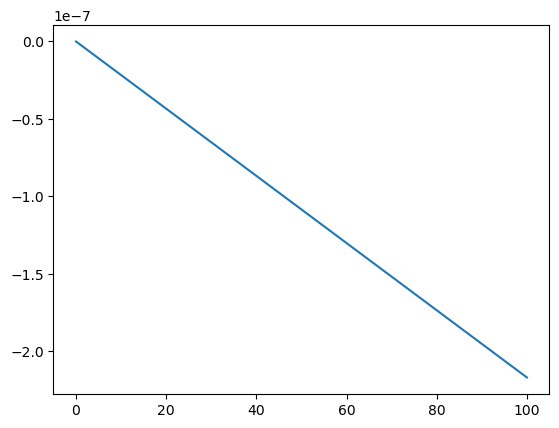

In [10]:
plt.plot(t,Enr[0]-E0)
print(Enr[0,-1]-E0)

The error of RK4 method is small, and is excellent for small times. Of course the error depends on timestep, but for 2000 function evaluations, this is small error. 

But we do see a problem: The energy is monotonically decreasing. If we simulate Newton's motion long enough we will loose all energy, and system will halt. This is very unphysical, therefore RK4 is not acceptable for molecular dynamics simulation.

Next we check the anharmonic oscilator.

In [11]:
data2E = Solve(t, [x,v], euler, anHarmonic)
data2R = Solve(t, [x,v], rk4, anHarmonic)

/var/folders/j8/d9m3r0zx7j37l3ktfl_n1xw00000gn/T/ipykernel_56755/1125370763.py:7: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([y[1],-w2*y[0]*(1-alpha*y[0])])


(-1.2, 1.7)

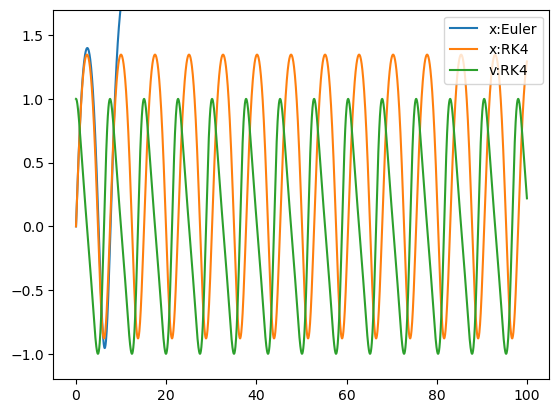

In [12]:
plt.plot(t, data2E[:,0], label='x:Euler')
plt.plot(t, data2R[:,0], label='x:RK4')
plt.plot(t, data2R[:,1], label='v:RK4')
plt.legend(loc='best')
plt.ylim([-1.2,1.7])

The Euler solution becomes unstable after just one period, while RK4 remains reasonable many periods.

Next we plot Phase-space portrait $(x,p)$ for HO and anharmonic oscilator.

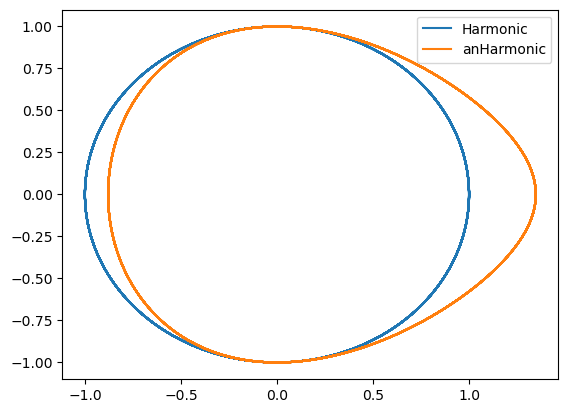

In [13]:
plt.plot(dataR[:,0], dataR[:,1], label='Harmonic')
plt.plot(data2R[:,0],data2R[:,1], label='anHarmonic')
plt.legend(loc='best')

How good is the energy of the ahharmonic oscilator?

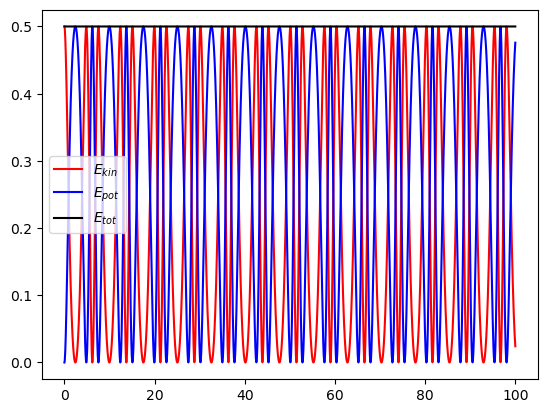

In [14]:
# Energy for the anharmonic oscilator
En2 = E_anharmonic(data2R.T)
plt.plot(t, En2[1], 'r-', label='$E_{kin}$')
plt.plot(t, En2[2], 'b-', label='$E_{pot}$')
plt.plot(t, En2[0], 'k-', label='$E_{tot}$')
plt.legend(loc='best')

But zoom-in shows that the algorithm is loosing energy with time. The error is small with small time-step, but long time unstable.

-3.023807507718246e-07


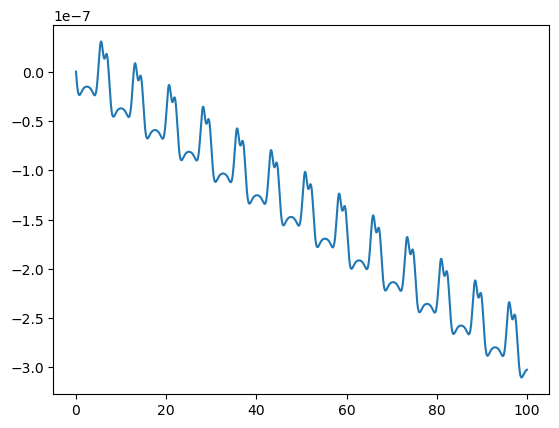

In [15]:
E0=En2[0,0]
plt.plot(t,En2[0]-E0)
print(En2[0,-1]-E0)

Let's try `scipy` recomended solver `scipy.solve_ivp`, which is also RK4, but with variable step and more powerful algorithm RK45, oe even eith order RK (`DOP853`).

In [16]:
from scipy.integrate import solve_ivp
help(solve_ivp)

Help on function solve_ivp in module scipy.integrate._ivp.ivp:

solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)
    Solve an initial value problem for a system of ODEs.
    
    This function numerically integrates a system of ordinary differential
    equations given an initial value::
    
        dy / dt = f(t, y)
        y(t0) = y0
    
    Here t is a 1-D independent variable (time), y(t) is an
    N-D vector-valued function (state), and an N-D
    vector-valued function f(t, y) determines the differential equations.
    The goal is to find y(t) approximately satisfying the differential
    equations, given an initial value y(t0)=y0.
    
    Some of the solvers support integration in the complex domain, but note
    that for stiff ODE solvers, the right-hand side must be
    complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
    To solve a problem in the complex domain, pass y0 with a co

In [17]:
tf=100.
sol=solve_ivp(anHarmonic, [0,tf], [x,v], rtol=1e-14, atol=5e-7)
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 2630
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.34367291e-02, 2.32365158e-01, 4.47372590e-01,
       6.87883729e-01, 9.61928130e-01, 1.26831360e+00, 1.59744802e+00,
       1.96014689e+00, 2.35100741e+00, 2.73837360e+00, 3.12707393e+00,
       3.51178920e+00, 3.87096546e+00, 4.20505645e+00, 4.54962871e+00,
       4.78908650e+00, 5.00018945e+00, 5.21129240e+00, 5.40503334e+00,
       5.58675814e+00, 5.76098202e+00, 5.93054034e+00, 6.09727981e+00,
       6.26240404e+00, 6.42670351e+00, 6.59080280e+00, 6.75541163e+00,
       6.92150115e+00, 7.09038495e+00, 7.26376557e+00, 7.44382418e+00,
       7.63341909e+00, 7.83647041e+00, 8.05863759e+00, 8.30811077e+00,
       8.59284643e+00, 8.90607918e+00, 9.24346658e+00, 9.61767274e+00,
       1.00087745e+01, 1.03957536e+01, 1.07849143e+01, 1.11642218e+01,
       1.15142969e+01, 1.18459430e+01, 

/Users/haule/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


We choose absolute tolerance `atol=5e-7` so that it uses approximately the same function evaluations, namely, around 2000.

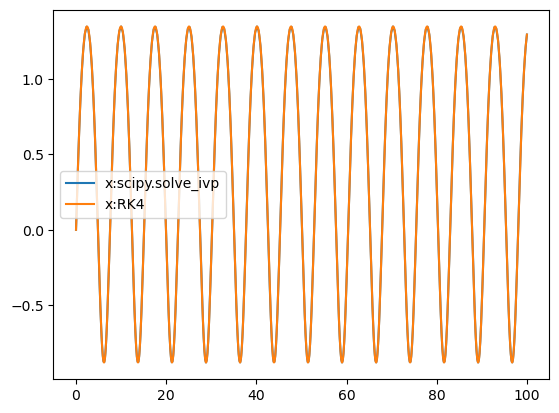

In [18]:
plt.plot(sol.t, sol.y[0], label='x:scipy.solve_ivp')
plt.plot(t, data2R[:,0], label='x:RK4')
plt.legend(loc='best');

Solution is very similar to our `RK4`. What about total energy and stability?

-5.527636871005548e-06


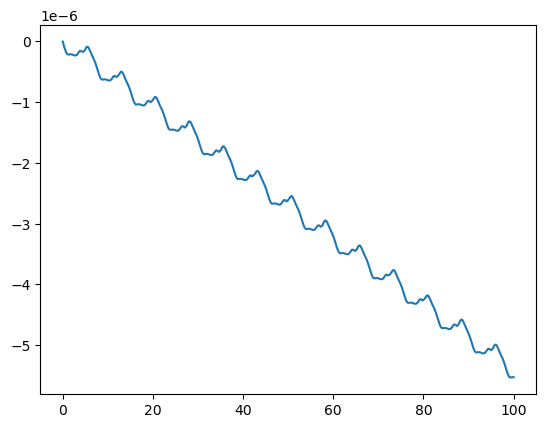

In [19]:
Enr = E_anharmonic(sol.y)

plt.plot(sol.t, Enr[0]-E0)
print(Enr[0,-1]-E0)

Dissapointingly, the error is even a bit larger, and definitely not stable.

## Verlet algorithm

Verlet algorithm is used in molecular dynamics simulations (when there is no energy loss), because it is stable and does not lead to energy loss with time. The precision of Verlet algorithm is only $O(h^3)$, which is worse than RK4, but stability is here more important than precision.
Below we derive Verlet's algorithm.


If there is no friction, we can explore the time-symmetry of Newton's Eq: they are time invariant when there is no friction.

First we recall the Taylor expansion of the soltuion, which should exist:

$$r(t+h)=r(t)+\dot{r}(t) h + \frac{1}{2}\ddot{r}(t) h^2 + O(h^3)$$

and because of the symmetry of Newton's Eq, we also have:

$$r(t-h)=r(t)-\dot{r}(t) h + \frac{1}{2}\ddot{r}(t) h^2 - O(h^3)$$

Next we assume that the explicit form for the acceleration $\ddot{r}(t)=a(t)$ exists in the form of the Newton's Eq. We will also replace $\dot{r}(t)$ with symbol for velocity $v$. 

We will now rewrite the last equation, but shift the time variable from $t\rightarrow t+h$:
$$r(t)=r(t+h)-v(t+h) h + \frac{1}{2}a(t+h) h^2 + O(h^3)$$
The very first Eq. above can be simply rewritten with $v$ and $a$ as:
$$r(t+h)=r(t)+ v(t) h + \frac{1}{2}a(t) h^2 + O(h^3)$$

If we sum these two Eq. together we get:
$$ v(t+h) = v(t) + \frac{1}{2}(a(t)+a(t+h)) h  + O(h^3)$$

The velocity Verlet algorithm uses the last two Eq. (for $r(t+h)$ and $v(t+h)$).

We notice that both Equations contain a common term, which we will call $v(t+h/2)$, namely,
$$v(t+\frac{1}{2}h) \equiv v(t) + \frac{h}{2} a(t)$$
In terms of this quantity, we can rewrite the above two Equations as
\begin{eqnarray}
&& v(t+h) = v(t+\frac{1}{2}h) + \frac{h}{2}a(t+h) \\
&& r(t+h) = r(t) + h\; v(t+\frac{1}{2}h)
\end{eqnarray}


Below we implement velocity Verlet algorithm:

In [20]:
def velocity_verlet(y, f, t, h):
    """Velocity Verlet

    Low-performance implementation because the force is calculated
    twice; should remember the second force calculation and use as
    input for the next step.

    For comparing different algorithms it is ok to use this
    implementation for convenience. For production level code you
    should use a better implementation that saves the second force
    evaluation.

    """
    F = f(t, y)   # [dy/dt, a]
    # a = F[1]      # this is a(t)
    # half step velocity
    y[1] += 0.5*h*F[1] # y[1] <- v[t+h/2] = v[t] + h/2 * a
    # full step position
    y[0] += h*y[1]     # r[t+h] = r[t] + h * v[t+h/2]
    # full step velocity (updated positions!)
    F = f(t+h, y)   # this is a(t+h), which should be reused in state of the art implementation
    y[1] += 0.5*h*F[1] # v[t+h] = v[t+h/2] + h/2 * a
    return y

Now we can just use it with previously developed fixed step `Solve` routine:

In [21]:
data3R = Solve(t, [x,v], velocity_verlet, anHarmonic)
Env = E_anharmonic(data3R.T)

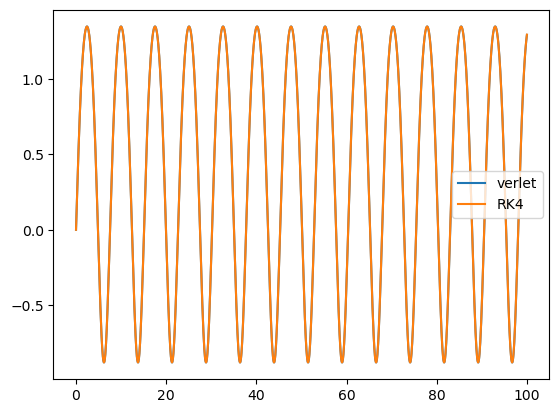

In [22]:
plt.plot(t,data3R[:,0], label='verlet')
plt.plot(t,data2R[:,0], label='RK4')
plt.legend(loc='best')

The verlet algorithm gives similar result as RK4 (but slightly less precise).

What about total energy?

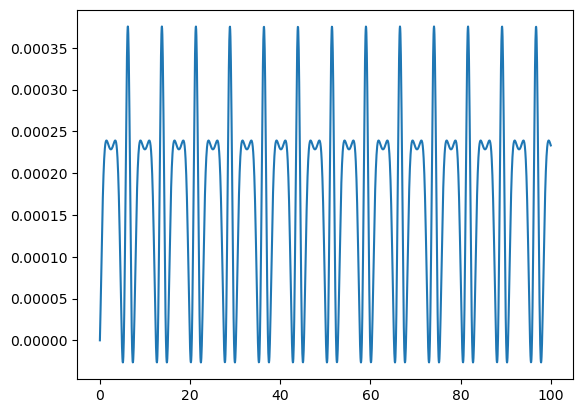

In [23]:
plt.plot(t,Env[0]-E0)

The total energy is substantially less precise, however, it is stable, in the sense that no matter how long we evolve the system, the error of the total energy is bounded. It can be shown that the cummulative error of Verlet algorithm is $O((\Delta t)^2)$, where $\Delta t$ is time-step. While RK4 is locally $O(h^5)$ for each step, but cummulative error is unbounded, hence diverging. Only Verlet has finite cummulative error.

## Homework: The Keppler problem

1) Simulate the motion of Earth in the solar system as a two body problem (taking into account only the Sun and the Earth). Derive the Newton's equation for the relative coordinate:
$$m \ddot{\vec{r}}=-G m M \frac{\vec{r}}{r}.$$ 

Turn the above equation into atronomical units (AU).
The astronomical units are:
    - length is meassured in units of distance between Earth and Sun $R\approx 1.5\;10^{11}$m
    - time is meassured in years.

Plot the Earth's orbit $(x,y)$ for 5000 years, and verify it is stable (the orbit is a circle with no time dependence). Also plot $x(t)$ and $y(t)$ for the last 5 out of 5000 years to see that period is what is expected.

2) Simulate the three body problem, which consists of Sun, Earth and Jupiter. The latter has mass $m_J/m_S\approx 9.55\; 10^{-4}$, and distance $5.2\; AU$. Note that the mass of Earth is $m_E/m_S\approx 3 10^{-6}$ and distance $1\; AU$.  

 - Simulate 5000 Earth years and plot the orbits of Sun, Eart, and Jupiter ($x(t)$ versus $y(t)$ for all three objects). Are the orbits stable?

 - Check how strong is the influence of the Jupiter on motion of the Earth. Plot $x(t)$ for the last 5 years of 5000 years for the case with and withouth Jupiter. 



4) It turns out that our solar system has uneven distribution of asteroids, as demonstrated by the picture below. We are plotting the number of asteroids as a function of the distance from the Sun. There are many gaps in the distribution plot, which are now named Kirkwood gaps, after Daniel Kirkwood, who discovered them. He showed that gaps are associated with Jupiter, because the orbits are in resonance with Jupiter's motion. For example, the 2/1 gap is such that an asteroid placed there would complete two orbits every time Jupiter completes one. Similarly there are 3/1, 5/2, and 7/3 resonance, all related to Jupiter. 
<img src="https://upload.wikimedia.org/wikipedia/commons/d/d3/Kirkwood_Gaps.svg" width="50%">


We would like to simulate Kirkwood gaps. To simulate 2/1 gap, we need to find the distance from the Sun that such asteroid would be placed at, and his initial velocity. Than we need to check the long term stability of such orbit. 

We first recall that all orbits in the solar system satisfy $R_i^3/T_i^2=const$. This is because centrifugal force ($m_i\omega_i^2 R_i$) and gravitational force ($G M m_i/R_i^2$) have to be balanced, hence $m_i (2\pi/T_i)^2 R_i = G M m_i/R_i^2$, where $M$ is the Solar's mass. We hence see that $R_i^3/T_i^2=G M/(4\pi^2)$. In AU units this equation is $R_i^3/T_i^2=1$

For Asteroid that completes the orbit in half the Saturn's year, it must satisfy $T_{asteroid}=R_{Saturn}^{3/2}/2$, and hence $R_{asteroid}=R_{Saturn}/2^{2/3}$, which is $R_{asteroid}=5.2/2^{2/3}\approx 3.2758$. It's starting velocity should be $v_{asteroid}=2\pi/\sqrt{R_{asteroid}}\approx 3.4715$.

For 3/1 gap, we should similarly have $R_{asteroid}=5.2/3^{2/3}\approx 2.5$ and $v_{asteroid}=2\pi/\sqrt{R_{asteroid}}\approx 3.974$.

For homework, simulate the three body problem: Sun, Jupiter and Asteroid. You can assume that the mass of Asteroid is vanishingly small. Here it is also safe to ignore Earth and its influence on Asteroid. Simulate 5000 Earth years of motion, and plot the orbits of the three objects $x(t)$ versus $y(t)$. Make sure you subtract the center of motion movement $\vec{R}_{cm}=m_1\vec{r}_1+m_2\vec{r}_2+m_3\vec{r_3}$ when plotting the orbits.

Do you see any change of the orbit of Asteroid over 5000 years?


### Sketch of the solution

1) For Keppler problem we use $\vec{r}_1$ and $\vec{r}_2$ for vector positions of the two bodies, like the Earth and the Sun. The Newton's Eq require:

\begin{eqnarray}
m_1 \ddot{\vec{r}_1} = -G m_1 m_2 \frac{\vec{r}_1-\vec{r}_2}{|\vec{r}_1-\vec{r}_2|^3}\\
m_2 \ddot{\vec{r}_2} = -G m_1 m_2 \frac{\vec{r}_2-\vec{r}_1}{|\vec{r}_2-\vec{r}_1|^3}
\end{eqnarray}

The center of mass can be fixed at the origin $m_1 \vec{r}_1+m_2 \vec{r}_2=0$.

The relative vector $$\vec{r}=\vec{r}_1-\vec{r}_2$$ then satisfies the equation
\begin{equation}
\ddot{\vec{r}}=G(m_1+m_2)\frac{\vec{r}}{|\vec{r}|^3}
\end{equation}
The gravitational constant $G$ can be obtained from information about the Earth's orbit. We know that Earth's orbit is almost circular. For circular orbits we know that centrifugal force and gravitational force have to be balanced, which means $m_E \omega^2 R= G m_S m_E/R^2$, where $R$ is Sun-Earth distance $m_S$ and $m_E$ are Sun and Earth mass, and $\omega$ frequency of the Earth's rotation, which is $\omega=2\pi/T$, with $T$ being one year. We thus have $$G=\frac{R^3}{m_S} \left(\frac{2\pi}{T}\right)^2 .$$

We want to meassure time in years $T$, and distance in Sun-Earth distance $R$. We thus define 
$$\vec{r}=R \vec{r_d}$$
$$t = T t_d $$
and in this AU units the above equation for relative vector is
$$\ddot{\vec{r}_d} = -4\pi^2 (1+\frac{m_E}{m_S})\frac{\vec{r}_d}{r_d^3}$$
The ratio of the mass $m_E/m_S= 3\, 10^{-6}$ is safe to neglect.

The initial conditions will be choosen so that we have a circular orbit. For example $\vec{r}_d=[1,0]$ and $\dot{\vec{r}_d}=[0,2\pi]$. The velocity for a circular motion is $v=\omega R$, which is $v=2\pi R/T$, and hence in AU units is just $\dot{y}_0=2\pi$.

We can choose the following set of variables $[x,y,\dot{x},\dot{y}]$, where $\vec{r}_d=[x,y]$. With these we can solve the Kepler equations by:
\begin{eqnarray}
\begin{bmatrix}\frac{d x}{dt}\\\frac{d y}{dt}\\ \frac{d \dot{x}}{dt}\\   \frac{d \dot{y}}{dt}\\ \end{bmatrix}
=\begin{bmatrix}
\dot{x}\\\dot{y}\\ -4\pi^2 \frac{x}{(x^2+y^2)^{3/2}}\\ -4\pi^2 \frac{x}{(x^2+y^2)^{3/2}}
\end{bmatrix}
\end{eqnarray}
with initial conditions $y_0=[1,0,0,2\pi]$

2) In the Keppler's three body problem, we have Sun, Earth and Jupiter with $$\frac{m_2}{m_1}=3\; 10^{-6}$$ and $$\frac{m_3}{m_1}=9.55\; 10^{-4}.$$ 

The Newton's equations are
\begin{eqnarray}
&&  \ddot{\vec{r}}_1 = -G m_1\left( \frac{m_2}{m_1}\frac{\vec{r}_1-\vec{r}_2}{|\vec{r}_1-\vec{r}_2|^3} +\frac{m_3}{m_1}\frac{\vec{r}_1-\vec{r}_3}{|\vec{r}_1-\vec{r}_3|^3}\right) \\
&&  \ddot{\vec{r}}_2 = -G m_1\left(\frac{\vec{r}_2-\vec{r}_1}{|\vec{r}_2-\vec{r}_1|^3} +\frac{m_3}{m_1}\frac{\vec{r}_2-\vec{r}_3}{|\vec{r}_2-\vec{r}_3|^3}\right) \\
&&  \ddot{\vec{r}}_3 = -G m_1\left(\frac{\vec{r}_3-\vec{r}_1}{|\vec{r}_3-\vec{r}_1|^3} +\frac{m_2}{m_1}\frac{\vec{r}_3-\vec{r}_2}{|\vec{r}_3-\vec{r}_2|^3}\right) \\
\end{eqnarray}
and in AU units become
\begin{eqnarray}
&&  \ddot{\vec{r}}_1 = -4\pi^2\left( \frac{m_2}{m_1}\frac{\vec{r}_1-\vec{r}_2}{|\vec{r}_1-\vec{r}_2|^3} +\frac{m_3}{m_1}\frac{\vec{r}_1-\vec{r}_3}{|\vec{r}_1-\vec{r}_3|^3}\right) \\
&&  \ddot{\vec{r}}_2 = -4\pi^2\left(\frac{\vec{r}_2-\vec{r}_1}{|\vec{r}_2-\vec{r}_1|^3} +\frac{m_3}{m_1}\frac{\vec{r}_2-\vec{r}_3}{|\vec{r}_2-\vec{r}_3|^3}\right) \\
&&  \ddot{\vec{r}}_3 = -4\pi^2\left(\frac{\vec{r}_3-\vec{r}_1}{|\vec{r}_3-\vec{r}_1|^3} +\frac{m_2}{m_1}\frac{\vec{r}_3-\vec{r}_2}{|\vec{r}_3-\vec{r}_2|^3}\right) \\
\end{eqnarray}

The initial condistions for Sun can be  $\vec{r}_1=0$ and $\dot{\vec{r}}_1=0$, for Earth as before $\vec{r}_2=[1,0]$ and $\dot{\vec{r}}_2=[0,2\pi]$, and for Jupiter $\vec{r}_3=[R_J/R,0]$ and $\dot{\vec{r}}_3=[0,\frac{2\pi}{\sqrt{R_J/R}}]$, where $R_J/R\approx 5.2$. The velocity folows from circular motion of planets, for which we know that gravitational force and centrigunal force are balanced $\omega^2 R_i = G m_S/R_i^2$ or $v_i^2/R_i=G m_S/R_i^2$ and hence $v_i^2 R_i=G m_S = R^3 (2\pi/T)^2$. In AU units each planet with circular orbit should satisfy $v_i=\frac{2\pi}{\sqrt{R_i}}$

3) Because asteroids are very light, we can neglect their mass compared to mass of Sun and Jupiter. In this case we can treat each Asteroid as an independent problem. We need to simulate the three bodies: Sun, Jupiter, and Asteroid. The masses are $m_2/m_1=9.55\; 10^{-4}$ and $m_3/m_1=0$.
The equations are identical to previous equations simulating Sun, Eart and Jupiter. 

The initial condistions for circular orbits are also $R_{asteroid\;(2/1)}=R_{Saturn}/2^{2/3}$, $R_{asteroid\;(3/1)}=R_{Saturn}/3^{2/3}$ and $v_{asteroid}=2\pi/\sqrt{R_{asteroid}}$.


In [26]:
from math import *
from numba import njit
@njit
def Keppler(t, y):
    """anharmonic EOM"""
    (x1,y1,vx1,vy1)=y
    c=4*np.pi**2
    t = np.array([x1,y1])/(x1**2+y1**2)**(3/2.)
    a = -c*t
    return np.array([vx1,vy1,a[0],a[1]])

@njit
def ThreeBody(t, y, m2_m1=9.55e-4, m3_m1=0):
    """anharmonic EOM"""
    (x1,y1,vx1,vy1,x2,y2,vx2,vy2,x3,y3,vx3,vy3)=y
    c=4*np.pi**2
    r12=np.array([x1-x2,y1-y2])
    r13=np.array([x1-x3,y1-y3])
    r23=np.array([x2-x3,y2-y3])
    t12=r12/(r12[0]**2+r12[1]**2)**(3/2.)
    t13=r13/(r13[0]**2+r13[1]**2)**(3/2.)
    t23=r23/(r23[0]**2+r23[1]**2)**(3/2.)
    a1 = -c*(m2_m1*t12+m3_m1*t13)
    a2 = -c*(-t12+m3_m1*t23)
    a3 = -c*(-t13-m2_m1*t23)
    #print(a1,a2,a3)
    # center of mass
    xCM = x1+m2_m1*x2
    return np.array([vx1,vy1,a1[0],a1[1],vx2,vy2,a2[0],a2[1],vx3,vy3,a3[0],a3[1]])
    

In [27]:
# Keppler problem for 5000 years
tf=5000.
sol=solve_ivp(Keppler, [0,tf], [1,0,0,2*pi], rtol=1e-14, atol=5e-7)
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 956570
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 8.31780817e-03, 3.87543305e-02, ...,
       4.99996119e+03, 4.99999252e+03, 5.00000000e+03])
 t_events: None
        y: array([[ 1.        ,  0.99863464,  0.97049986, ...,  0.23956125,
         0.42491401,  0.46699369],
       [ 0.        ,  0.05223854,  0.24110146, ..., -0.96955822,
        -0.90381473, -0.882808  ],
       [ 0.        , -0.32822444, -1.51488601, ...,  6.10367325,
         5.68979695,  5.55755286],
       [ 6.28318531,  6.27460647,  6.09783093, ...,  1.50810725,
         2.67496071,  2.93986513]])
 y_events: None


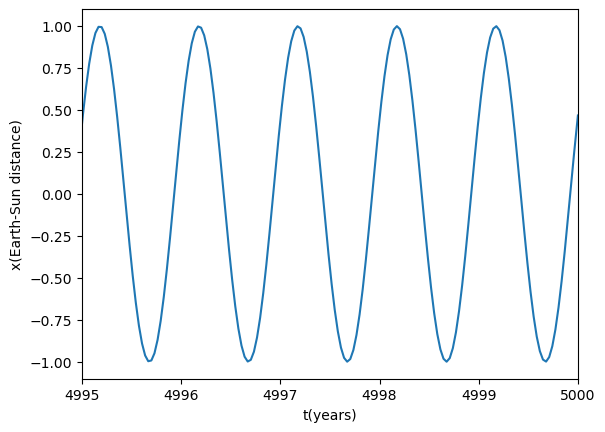

In [28]:
# last 5 of 5000 years
plt.plot(sol.t, sol.y[0])
plt.xlim([4995,5000]);
plt.xlabel('t(years)')
plt.ylabel('x(Earth-Sun distance)');

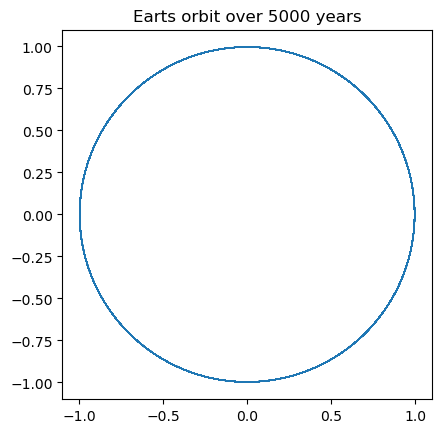

In [29]:
# Eart's orbit for 5000 years
fig, ax = plt.subplots(1,1)
ax.set_title('Earts orbit over 5000 years')
ax.plot(sol.y[0],sol.y[1],lw=0.1)
ax.set_aspect('equal', adjustable='box')

In [30]:
# Sun, Earth, Jupyter
# Initial condistions
rS=0
vS=0
rE=[1,0]
vE=[0,2*pi]
rJ=[5.2,0]
vJ=[0,2*pi/sqrt(5.2)]
# combined into initial condition
y0=[rS,rS,vS,vS,rE[0],rE[1],vE[0],vE[1],rJ[0],rJ[1],vJ[0],vJ[1]]
print('y0=', y0)
m2m1=3.0e-6
m3m1=9.55e-4

tf=5000. # total time in Earth years

sol1=solve_ivp(ThreeBody, [0,tf], y0, rtol=1e-14, atol=5e-7, args=(m2m1,m3m1))

print(sol1)
Rcm1=(sol1.y[0:2]+sol1.y[4:6]*m2m1+sol1.y[8:10]*m3m1)/(1+m2m1+m3m1)

y0= [0, 0, 0, 0, 1, 0, 0, 6.283185307179586, 5.2, 0, 0, 2.7553590302269777]


/Users/haule/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 851918
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 9.28370501e-03, 4.32735233e-02, ...,
       4.99996166e+03, 4.99999673e+03, 5.00000000e+03])
 t_events: None
        y: array([[ 0.00000000e+00,  6.51876508e-08,  1.41563469e-06, ...,
         9.86445821e-03,  9.87720317e-03,  9.87829715e-03],
       [ 0.00000000e+00,  1.97744447e-10,  1.99910273e-08, ...,
         1.32375709e+01,  1.32377559e+01,  1.32377732e+01],
       [ 0.00000000e+00,  1.40431181e-05,  6.53932239e-05, ...,
         3.89817009e-04,  3.37026763e-04,  3.32103772e-04],
       ...,
       [ 0.00000000e+00,  2.55798373e-02,  1.19223645e-01, ...,
         1.40050170e+01,  1.39093223e+01,  1.39003871e+01],
       [ 0.00000000e+00, -1.35542231e-02, -6.31741362e-02, ...,
        -4.07442073e-01, -3.56540045e-01, -3.51787252e-01],
       [ 2.75535903e+00,  2.75532569e+00,  

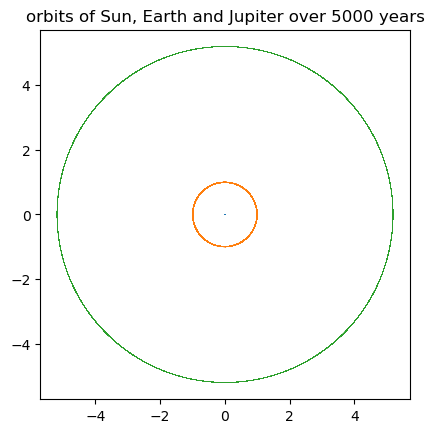

In [31]:
fig, ax = plt.subplots(1,1)
ax.plot(sol1.y[0]-Rcm1[0], sol1.y[1]-Rcm1[1],lw=0.1)
ax.plot(sol1.y[4]-Rcm1[0], sol1.y[5]-Rcm1[1],lw=0.1)
ax.plot(sol1.y[8]-Rcm1[0], sol1.y[9]-Rcm1[1],lw=0.1)
ax.set_title('orbits of Sun, Earth and Jupiter over 5000 years')
ax.set_aspect('equal', adjustable='box')

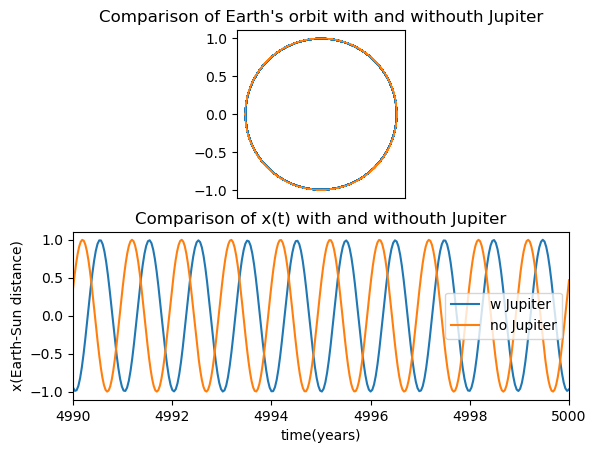

In [32]:
fig, ax = plt.subplots(2,1)

ax[0].plot(sol1.y[4]-Rcm1[0], sol1.y[5]-Rcm1[1],lw=0.1)
ax[0].plot(sol.y[0], sol.y[1], lw=0.1)
ax[0].set_aspect('equal', adjustable='box')
ax[0].set_title('Comparison of Earth\'s orbit with and withouth Jupiter')
ax[0].axes.get_xaxis().set_visible(False)
ax[1].plot(sol1.t, sol1.y[4]-Rcm1[0], label='w Jupiter')
ax[1].plot(sol.t, sol.y[0], label='no Jupiter')
ax[1].set_xlim([4990,5000])
ax[1].set_title('Comparison of x(t) with and withouth Jupiter')
ax[1].set_ylabel('x(Earth-Sun distance)')
ax[1].set_xlabel('time(years)')
ax[1].legend(loc='best');

In [33]:
# distance from Sun to asteroid
ra=5.2/2**(2/3.)
# Initial condistions
rS=0
vS=0
rJ=[5.2,0]
vJ=[0,2*pi/sqrt(5.2)]
rA=[ra,0]
vA=[0,2*pi/sqrt(ra)]
# combined into initial condition
y0=[rS,rS,vS,vS,rJ[0],rJ[1],vJ[0],vJ[1],rA[0],rA[1],vA[0],vA[1]]
m2m1=9.55e-4
m3m1=0

tf=5000. # total time in Earth years

sol2=solve_ivp(ThreeBody, [0,tf], y0, rtol=1e-14, atol=5e-7, args=(m2m1,m3m1))

print(sol2)
Rcm2=(sol2.y[0:2]+sol2.y[4:6]*m2m1+sol2.y[8:10]*m3m1)/(1+m2m1+m3m1)

/Users/haule/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 157676
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.96342578e-02, 2.11350743e-01, ...,
       4.99976071e+03, 4.99995687e+03, 5.00000000e+03])
 t_events: None
        y: array([[ 0.00000000e+00,  2.68751868e-07,  3.11086368e-05, ...,
         9.60937759e-03,  9.76187890e-03,  9.78846245e-03],
       [ 0.00000000e+00,  9.32011252e-10,  1.16177293e-06, ...,
         1.31419491e+01,  1.31429581e+01,  1.31431819e+01],
       [ 0.00000000e+00,  2.73755649e-05,  2.94072052e-04, ...,
         9.07792146e-04,  6.45653987e-04,  5.86971088e-04],
       ...,
       [ 0.00000000e+00,  6.81560868e-02,  7.27586711e-01, ...,
         9.91709418e+00,  9.94662118e+00,  9.97276141e+00],
       [ 0.00000000e+00, -7.20287362e-02, -7.68929316e-01, ...,
         3.44853713e+00,  3.49254338e+00,  3.48093175e+00],
       [ 3.47153484e+00,  3.47078264e+00,  

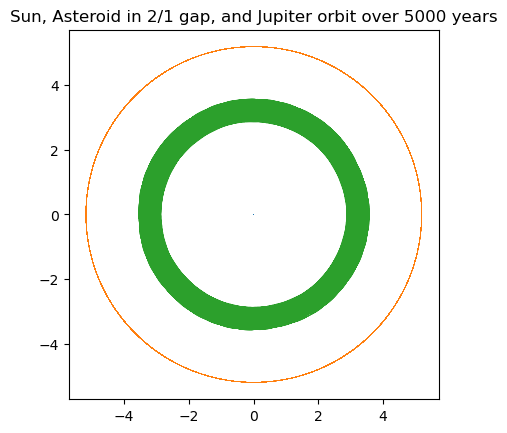

In [34]:
fig, ax = plt.subplots(1,1)
ax.plot(sol2.y[0]-Rcm2[0], sol2.y[1]-Rcm2[1],lw=0.1)
ax.plot(sol2.y[4]-Rcm2[0], sol2.y[5]-Rcm2[1],lw=0.1)
ax.plot(sol2.y[8]-Rcm2[0], sol2.y[9]-Rcm2[1],lw=0.1)
ax.set_title('Sun, Asteroid in 2/1 gap, and Jupiter orbit over 5000 years')
ax.set_aspect('equal', adjustable='box')

In [35]:
# distance from Sun to asteroid
ra=5.2/3**(2/3.)
# Initial condistions
rS=0
vS=0
rJ=[5.2,0]
vJ=[0,2*pi/sqrt(5.2)]
rA=[ra,0]
vA=[0,2*pi/sqrt(ra)]
# combined into initial condition
y0=[rS,rS,vS,vS,rJ[0],rJ[1],vJ[0],vJ[1],rA[0],rA[1],vA[0],vA[1]]
# masses
m2m1=9.55e-4
m3m1=0

tf=5000.  # total time in Earth years

sol3=solve_ivp(ThreeBody, [0,tf], y0, rtol=1e-14, atol=5e-7, args=(m2m1,m3m1))
print(sol3)
Rcm3=(sol3.y[0:2]+sol3.y[4:6]*m2m1+sol3.y[8:10]*m3m1)/(1+m2m1+m3m1)

/Users/haule/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 223622
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.70626240e-02, 1.49703289e-01, ...,
       4.99984203e+03, 4.99997571e+03, 5.00000000e+03])
 t_events: None
        y: array([[ 0.00000000e+00,  2.02962178e-07,  1.56157131e-05, ...,
         9.70380591e-03,  9.79297876e-03,  9.80657205e-03],
       [ 0.00000000e+00,  6.11667949e-10,  4.12989005e-07, ...,
         1.31424463e+01,  1.31431382e+01,  1.31432646e+01],
       [ 0.00000000e+00,  2.37901038e-05,  2.08512973e-04, ...,
         7.57225039e-04,  5.76278679e-04,  5.43064607e-04],
       ...,
       [ 0.00000000e+00,  6.77971086e-02,  5.89307810e-01, ...,
         1.15109506e+01,  1.11483526e+01,  1.10917889e+01],
       [ 0.00000000e+00, -1.07684101e-01, -9.36012023e-01, ...,
         2.60430499e+00,  3.18245218e+00,  3.27253268e+00],
       [ 3.97391538e+00,  3.97245338e+00,  

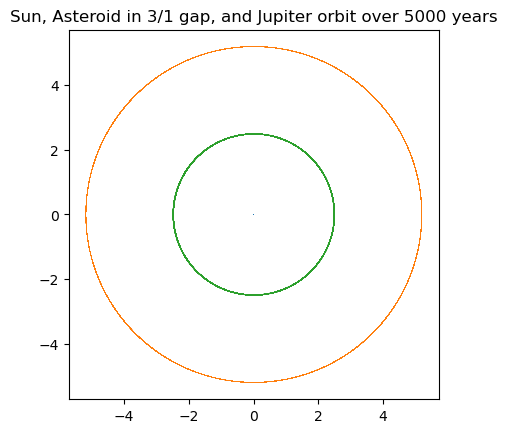

In [36]:
fig, ax = plt.subplots(1,1)
ax.plot(sol3.y[0]-Rcm3[0], sol3.y[1]-Rcm3[1],lw=0.1)
ax.plot(sol3.y[4]-Rcm3[0], sol3.y[5]-Rcm3[1],lw=0.1)
ax.plot(sol3.y[8]-Rcm3[0], sol3.y[9]-Rcm3[1],lw=0.1)
ax.set_title('Sun, Asteroid in 3/1 gap, and Jupiter orbit over 5000 years')
ax.set_aspect('equal', adjustable='box')